In [5]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [6]:
%matplotlib inline

In [7]:
import requests

In [8]:
from io import StringIO

In [9]:
url='http://elections.huffingtonpost.com/pollster/api/charts/2012-general-election-romney-vs-obama.csv'

In [11]:
source = requests.get(url).text

In [15]:
poll_data=StringIO(source)

In [16]:
poll_df=pd.read_csv(poll_data)

In [17]:
poll_df.head()

,Obama,Romney,Undecided,Other,poll_id,pollster,start_date,end_date,sample_subpopulation,sample_size,mode,partisanship,partisan_affiliation
0,47.0,47.0,6.0,NaN,16674,Politico/GWU/Battleground,2012-11-04,2012-11-05,Likely Voters,1000.0,Live Phone,Nonpartisan,None
1,49.0,47.0,3.0,NaN,16733,YouGov/Economist,2012-11-03,2012-11-05,Likely Voters,740.0,Internet,Nonpartisan,None
2,48.0,48.0,4.0,NaN,16681,Gravis Marketing,2012-11-03,2012-11-05,Likely Voters,872.0,Automated Phone,Nonpartisan,None
3,50.0,49.0,NaN,1.0,16679,IBD/TIPP,2012-11-03,2012-11-05,Likely Voters,712.0,Live Phone,Nonpartisan,None
4,48.0,49.0,NaN,NaN,16677,Rasmussen,2012-11-03,2012-11-05,Likely Voters,1500.0,Automated Phone,Nonpartisan,None


/Users/kenichiroouchi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='partisan_affiliation', ylabel='count'>

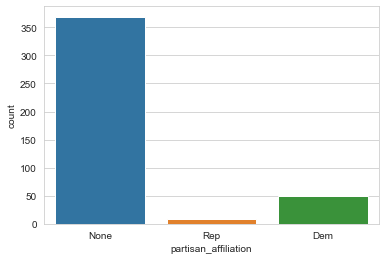

In [20]:
sns.countplot('partisan_affiliation', data=poll_df)

<AxesSubplot:xlabel='partisan_affiliation', ylabel='count'>

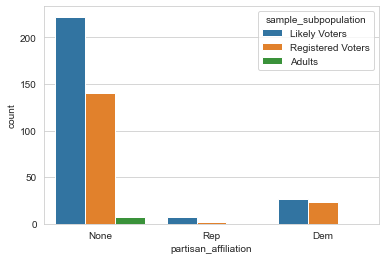

In [22]:
sns.countplot('partisan_affiliation',data=poll_df, hue='sample_subpopulation')

In [42]:
avg = pd.DataFrame(poll_df.mean())

In [48]:
avg_1=avg.drop(['Other','poll_id','sample_size'], axis=0)
avg_1

,0
Obama,47.161215
Romney,45.228972
Undecided,5.615942


In [26]:
std=pd.DataFrame(poll_df.std())

In [51]:
std_1=std.drop(['Other','poll_id','sample_size'], axis=0)
std_1

,0
Obama,2.100449
Romney,2.370565
Undecided,2.629407


<AxesSubplot:>

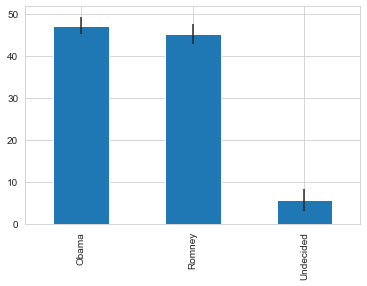

In [49]:
avg_1.plot(yerr=std, kind='bar', legend=False)

In [52]:
poll_avg=pd.concat([avg_1, std_1], axis=1)
poll_avg.columns=['ave', 'std']
poll_avg

,ave,std
Obama,47.161215,2.100449
Romney,45.228972,2.370565
Undecided,5.615942,2.629407
